In [2]:
library(GenomicFeatures)
library(ChIPseeker)
library(dplyr)
library(ggplot2)
library(tidyr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges



Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: AnnotationDbi

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

  

In [3]:
Full_anno_table<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/N4_filtered-annotated-peaks_minfoldch5_genebody_plus_500bpStart-to-plus-600bpStop_111924.tsv",
header=T,sep="\t",comment.char="",quote="\"",stringsAsFactors=F)

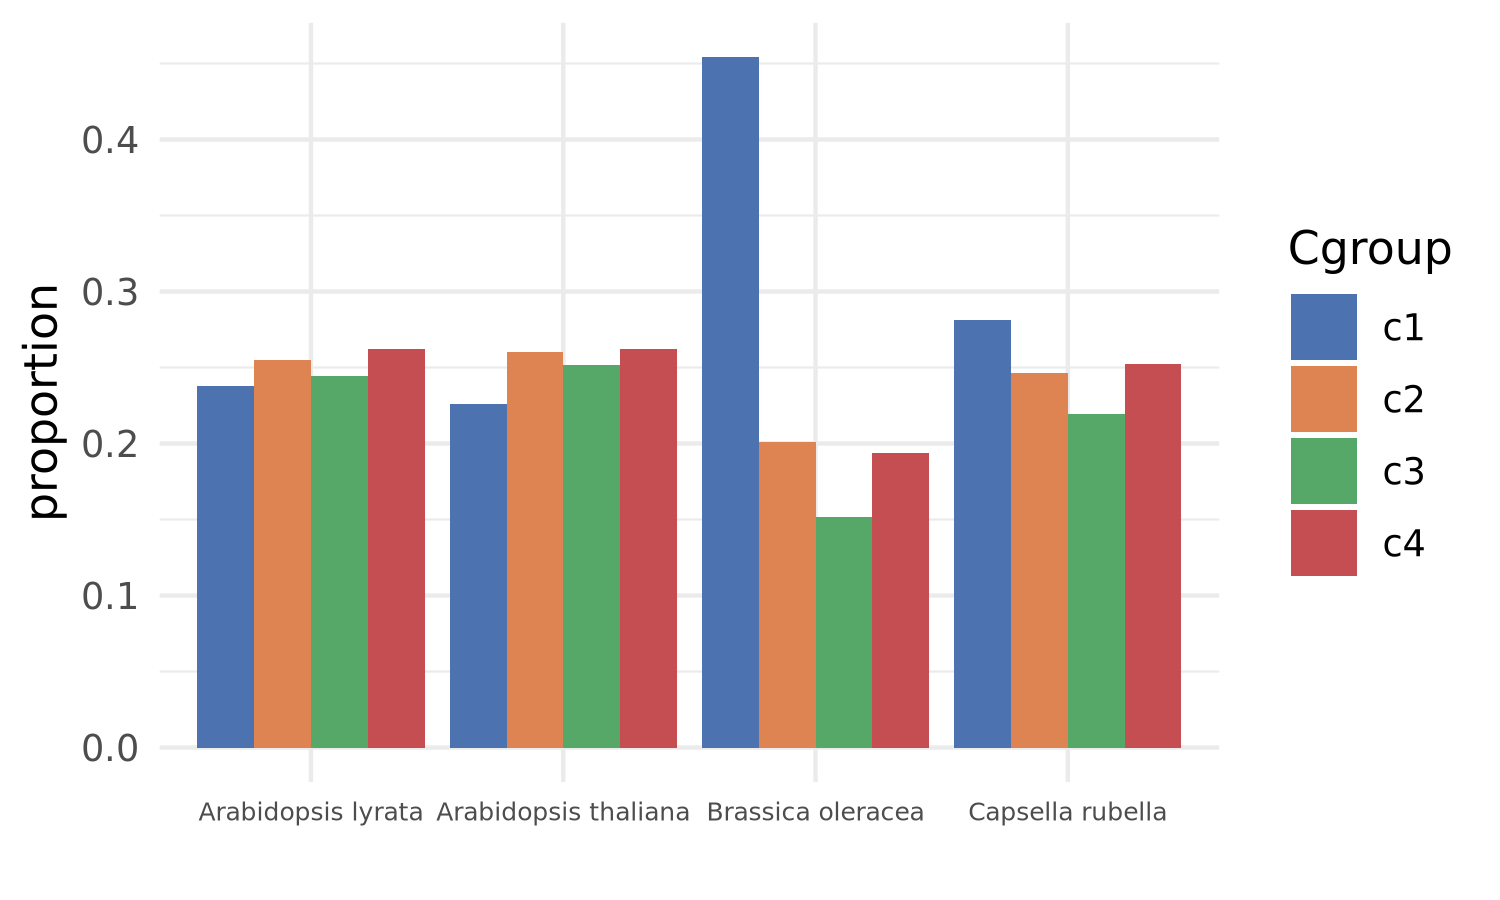

In [4]:
options(repr.plot.width=5,repr.plot.height=3,repr.plot.res=300)
Full_anno_table %>%
    group_by(species,n_cons_species_minfrac0) %>%
    tally() %>%
    ungroup() %>%
    group_by(species) %>%
    mutate(frequency=n/sum(n)) %>%
    ungroup() %>%
    mutate(species = factor(species,
    levels = c("Arabidopsis_lyrata_MN47","Arabidopsis_thaliana_Col-0","Brassica_oleracea_TO1000DH3","Capsella_rubella_Monte_Gargano"),
    labels=c("Arabidopsis lyrata","Arabidopsis thaliana","Brassica oleracea","Capsella rubella"))) %>%
    mutate(n_cons_species_minfrac0=as.character(n_cons_species_minfrac0)) %>%
    ggplot(aes(x=species,y=frequency,fill=n_cons_species_minfrac0))+
        geom_col(position = "dodge")+
    theme_minimal()+
    scale_fill_manual(values = c("1"="#4c72b0","2"="#dd8452","3"="#55a868","4"="#c44e52"),
                    labels=c("c1","c2","c3","c4"))+
    labs(x="",y="proportion",fill="Cgroup")+
    theme(axis.text.x = element_text(size=6))

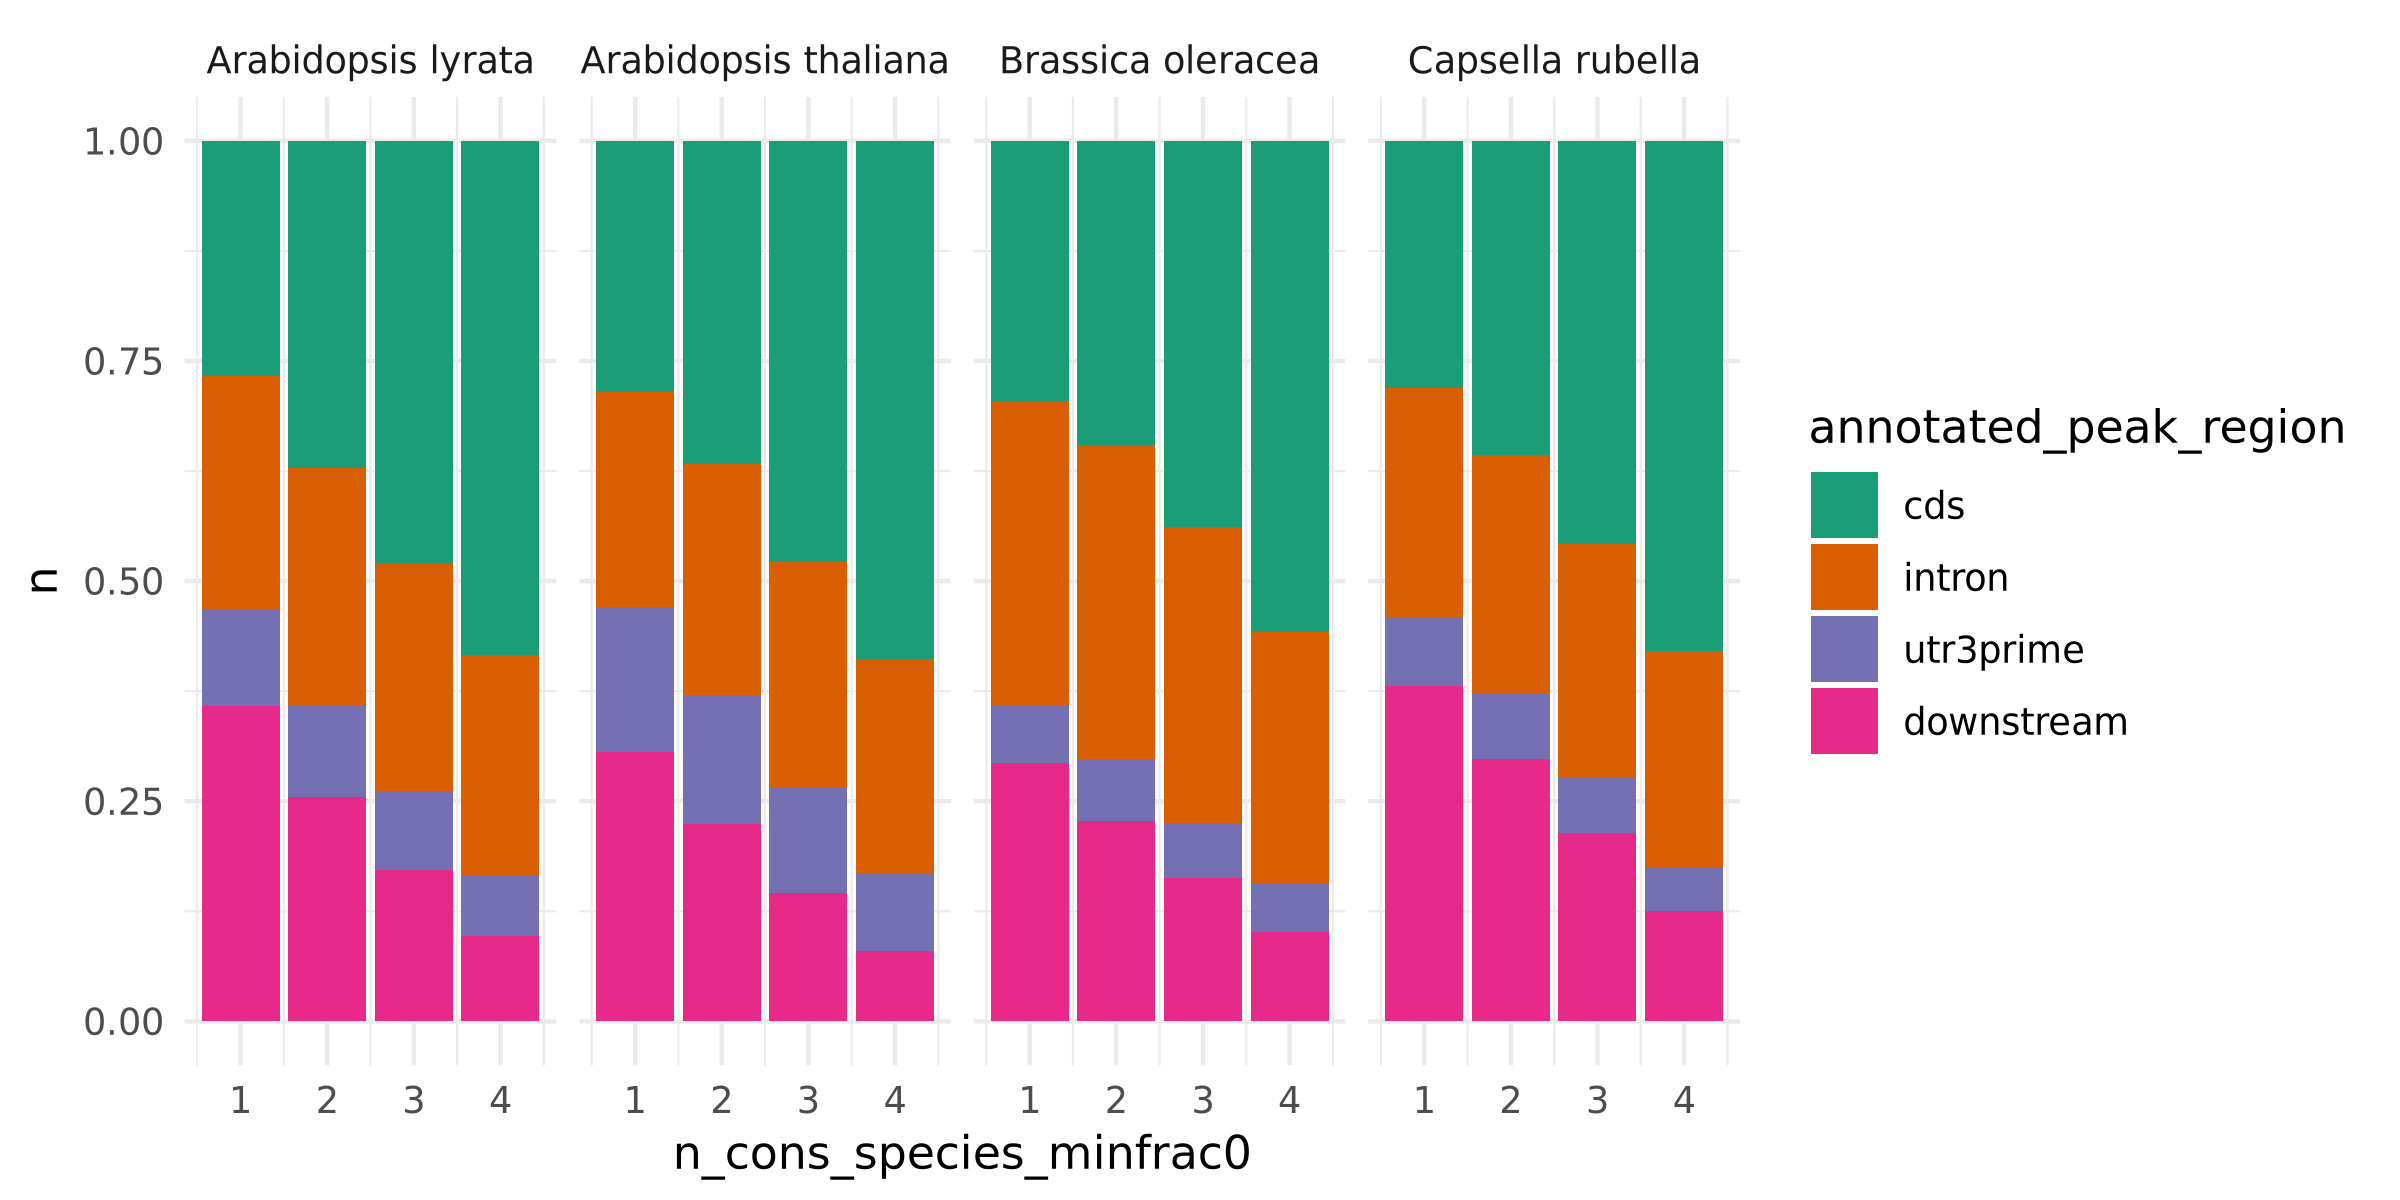

In [5]:
options(repr.plot.width=8,repr.plot.height=4,resolution=300)
Full_anno_table %>%
group_by(species,n_cons_species_minfrac0,annotated_peak_region) %>%
tally() %>%
group_by(species,n_cons_species_minfrac0) %>%
mutate(frequency=n/sum(n)) %>%
ungroup() %>%
mutate(annotated_peak_region = factor(annotated_peak_region,
    levels = c("upstream","utr5prime","cds","intron","utr3prime","downstream"))) %>%
mutate(species = factor(species,
    levels = c("Arabidopsis_lyrata_MN47","Arabidopsis_thaliana_Col-0","Brassica_oleracea_TO1000DH3","Capsella_rubella_Monte_Gargano"),
    labels=c("Arabidopsis lyrata","Arabidopsis thaliana","Brassica oleracea","Capsella rubella"))) %>%
ggplot(aes(x=n_cons_species_minfrac0,y=n,fill=annotated_peak_region))+
geom_col(position = "fill")+
facet_grid(.~species)+
theme_minimal()+
scale_fill_brewer(palette = "Dark2")

#### average plot with ChIPseeker

In [6]:
cds_primary_bed <- read.table("/clusterfs/jgi/groups/gentech/seqtech/plant_multidap_data/genomes/annotations/Arabidopsis_thaliana_Col-0_cds_primary.gff",header = F,stringsAsFactors = F) %>%
makeGRangesFromDataFrame(seqnames.field = "V1",start.field = "V4",end.field = "V5",strand.field = "V7")

ATG_gr <- cds_primary_bed

In [5]:
Full_anno_table %>%
    filter(species=="Arabidopsis_thaliana_Col-0",tf=="AT1G01060") %>%
    makeGRangesFromDataFrame(seqnames.field = "peak_chr",
                            start.field = "peak_start",
                            end.field = "peak_end") ->tf_gr

>> plotting figure...			 2024-12-30 21:29:07 
>> preparing end_site regions by gene... 2024-12-30 21:29:07
>> preparing tag matrix...  2024-12-30 21:29:07 


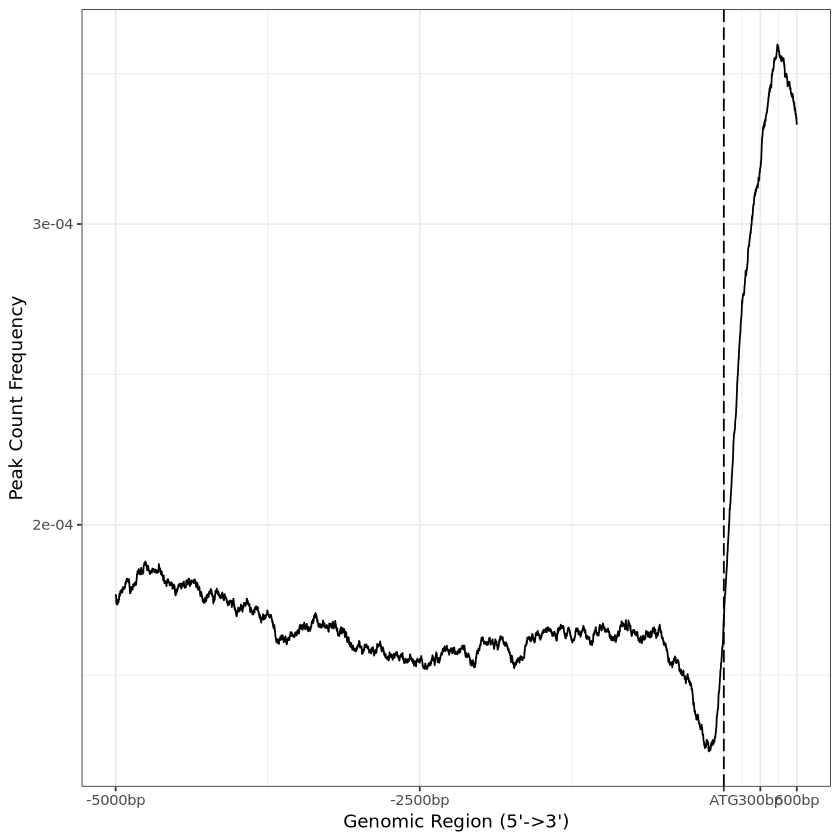

In [7]:
getTagMatrix(tf_gr,
windows = makeBioRegionFromGranges(ATG_gr,type = "end_site",upstream = 5000, downstream = 600,by="gene")) %>%
plotAvgProf(xlim=c(-5000, 600),
xlab="Genomic Region (5'->3')", ylab = "Peak Count Frequency",origin_label = "ATG")